Take a look at the Linnerud dataset in Scikit-learn. This dataset has multiple targets: 'It consists of three exercise (data) and three physiological (target) variables collected from twenty middle-aged men in a fitness club'.

In your own words, describe how to create a Regression model that would plot the relationship between the waistline and how many situps are accomplished. Do the same for the other datapoints in this dataset.

- Create feature and target data (Waist and situps)
- Describe the data to know the mean, median and other important statistical data from the data.
- Visualize the correlation by plotting a scatterplot with the feature and target data. 
- Train the regression model and calculate the loss

In [4]:
# Import modules we'll need for this notebook
import pandas as pd
from sklearn import datasets, linear_model, model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Load the dataset
# The Linnerud dataset is a multivariate regression dataset
# It contains three exercise measurements and three physiological measurements
# The dataset is available in sklearn
X, y = datasets.load_linnerud(return_X_y=True, as_frame=True)
X.head()

,Chins,Situps,Jumps
0,5.0,162.0,60.0
1,2.0,110.0,60.0
2,12.0,101.0,101.0
3,12.0,105.0,37.0
4,13.0,155.0,58.0


In [6]:
y.head()

,Weight,Waist,Pulse
0,191.0,36.0,50.0
1,189.0,37.0,52.0
2,193.0,38.0,58.0
3,162.0,35.0,62.0
4,189.0,35.0,46.0


In [8]:
# Create a DataFrame for the features and target
df = pd.DataFrame(y, columns=['Waist'])
# Add the target variable to the DataFrame
target= X['Situps']
df['Situps'] = target
df.head()






,Waist,Situps
0,36.0,162.0
1,37.0,110.0
2,38.0,101.0
3,35.0,105.0
4,35.0,155.0


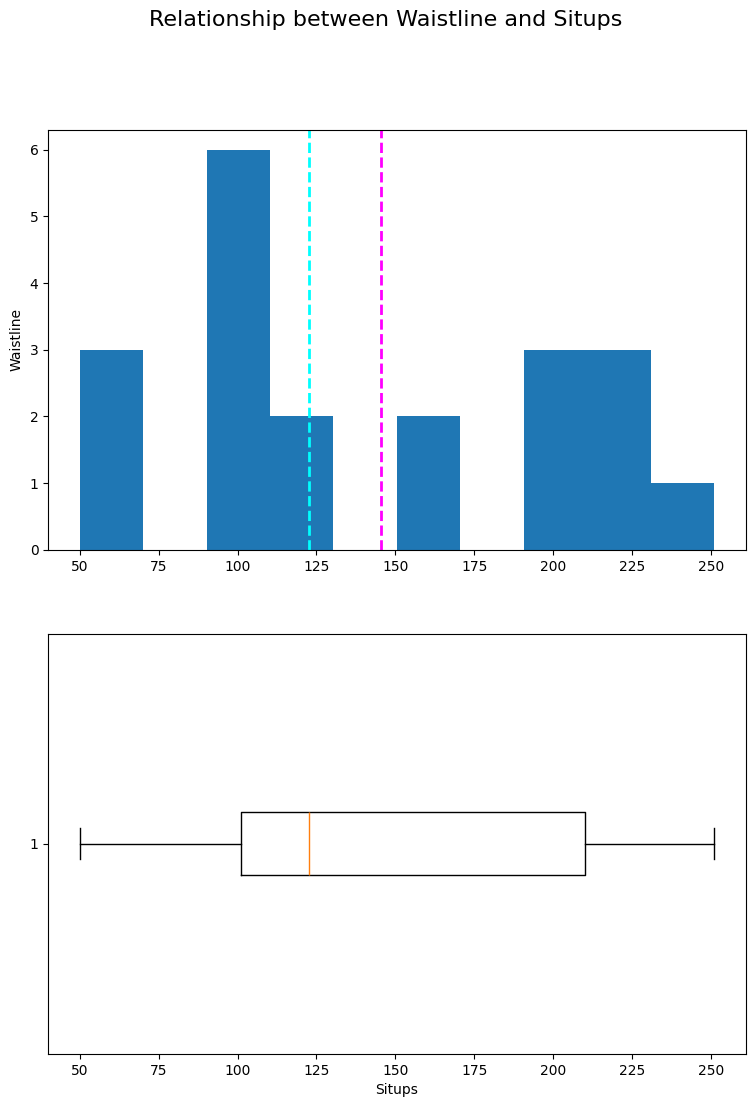

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# This ensures plots are displayed inline in the Jupyter notebook
%matplotlib inline

# Get the label column
label = df['Situps']


# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(label, bins=10)
ax[0].set_ylabel('Waistline')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Situps')

# Add a title to the Figure
fig.suptitle('Relationship between Waistline and Situps', fontsize=16)

# Show the figure
fig.show()

Visualize correlation between the number of situps and waistline

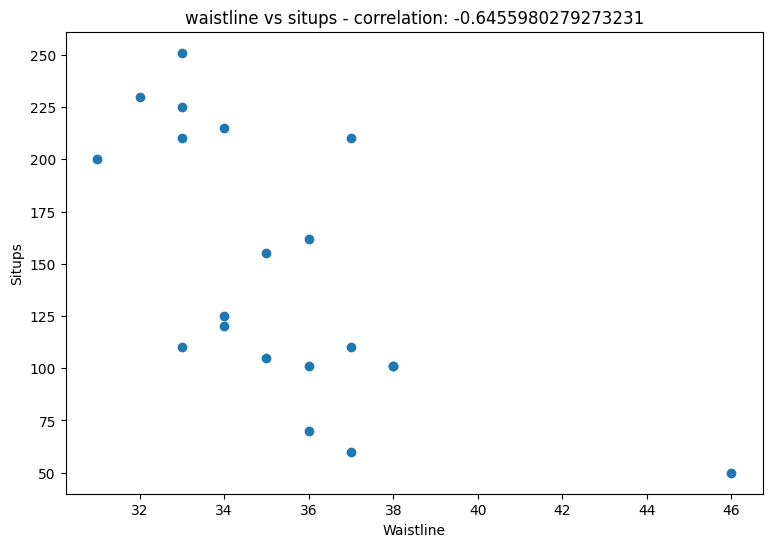

In [13]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
feature = df['Waist']
label = df['Situps']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label)
plt.xlabel('Waistline')
plt.ylabel('Situps')
ax.set_title('waistline vs situps - correlation: ' + str(correlation))
plt.show()

In [14]:
# Separate features and labels
X, y = df['Waist'].values, df['Situps'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[36. 37. 38. 35. 35. 36. 38. 34. 31. 33.]

Labels:
[162. 110. 101. 105. 155. 101. 101. 125. 200. 251.]


In [15]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.33, random_state=42)
print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 13 rows
Test Set: 7 rows


In [18]:
# train the model
model = LinearRegression()
model.fit(X_train.reshape(-1, 1), y_train)




LinearRegression()

In [ ]:
# make predictions
y_pred = model.predict(X_test.reshape(-1, 1))


In [ ]:
# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
# calculate the coefficient of determination
r2 = r2_score(y_test, y_pred)
print('Coefficient of Determination:', r2)

Mean Squared Error: 3.4322282825078703
Coefficient of Determination: 0.3629576293830089


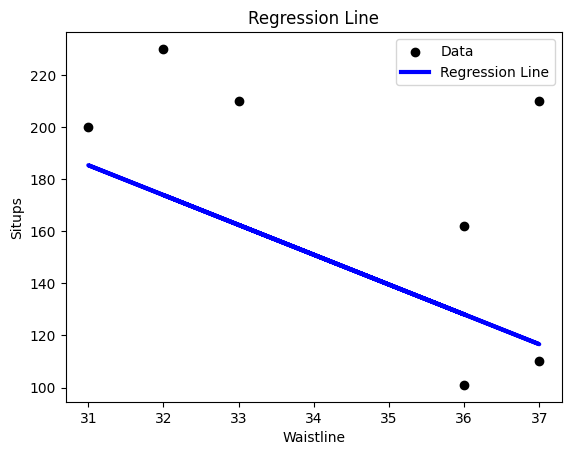

In [20]:
# Plot the results
plt.scatter(X_test, y_test, color='black', label='Data')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression Line')
plt.xlabel('Waistline')
plt.ylabel('Situps')
plt.title('Regression Line')
plt.legend()
plt.show()
# The model is trained and evaluated. Now we can use it to make predictions on new data.